The Nutmeg data set is based on 4 years of property insurance policies from 2013 to 2017. There are roughly 1 million policies in the training data and each policy only has one observation. There are almost 250000 policies that were canceled during the effective term. In the test data, the cancelation indicator is NA. Your work is to build a model on the training data and use your best model to predict the cancelation indicator for each policy in test data.

<br>
**Variable descriptions**

id - Policy id (cannot be used in model)

tenure - Number of years with Kangaroo

claim.ind - Occurrence of claim (0=no, 1=yes)

n.adults - Number of adults in the property

n.children - Number of children in the property

ni.gender - Gender of policyholder

ni.marital.status - Marital status of policyholder (0=no, 1=yes)

premium - Price of the policy

sales.channel - Medium through which policy was purchased

coverage.type - Type of coverage

dwelling.type - Type of dwelling

len.at.res - Length at residence (how long policyholder lived at property)

credit - Financial credit level of policyholder

house.color - Color of house

ni.age - Age of policholder

year - Year of the policy

zip.code - Zip code of the property

cancel - cancelation indicator (0=no, 1=yes). This is the response variable

# Load data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
#test = pd.read_csv("test.csv")

In [3]:
#pandas_profiling.ProfileReport(df)
#pip install pandas-profiling

In [4]:
pd.options.display.max_rows = 20  # set up the number of lines to display

In [5]:
df.columns

Index(['id', 'cancel', 'year', 'zip.code', 'house.color', 'ni.age',
       'len.at.res', 'credit', 'coverage.type', 'dwelling.type', 'premium',
       'sales.channel', 'ni.gender', 'ni.marital.status', 'n.adults',
       'n.children', 'tenure', 'claim.ind'],
      dtype='object')

In [6]:
categorical = ['house.color', 'credit', 'coverage.type', 
               'dwelling.type', 'sales.channel', 'ni.marital.status', 'claim.ind']
#pd.get_dummies(df[categorical])

# Preliminary check

In [7]:
df.drop(['id'], axis = 1, inplace = True) # dropping id; dropping column by name

## Remove anomaly

In [8]:
df = df[df['cancel'] >= 0] # Remove cancel = -1; deleting 3452 obs
df = df[df['ni.age'] <= 120] # Remove ni.age > 120; deleting 1497 obs
df = df[df['ni.age'] > df['len.at.res']] # Remove len.at.res > age; deleting 6789 obs


In [148]:
type(df['n.adults'])

pandas.core.series.Series

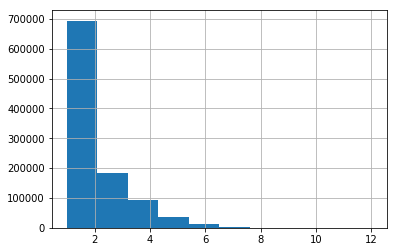

In [149]:
### Check if n. adults & n.children are integers
#df['n.adults'].value_counts(sort = True).hist() #no non-integers exist
df['n.adults'].hist()
#n.adults2 = df['n.adults'].value_counts(sort = True)

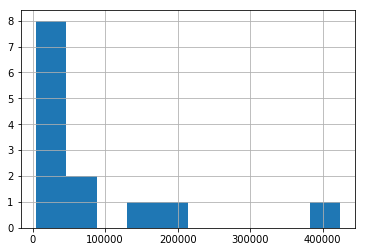

In [131]:
df['n.children'].value_counts(sort = True).hist() #no non-integers exist

### Zipcode  (unsolved)

merge from ...



In [11]:
#print(df['zip.code'].value_counts(sort = True, ascending = True, bins = 10))

In [12]:
df_zipcode_integer = df['zip.code']%1 == 0
print(df_zipcode_integer.sum())
print(df_zipcode_integer.shape)
print(df_zipcode_integer.shape[0] - df_zipcode_integer.sum())
print(df['zip.code'].isna().sum())
#All entries in zip.code are either integer or na values

1035898
(1036837,)
939
939


In [13]:
#ValueError: Cannot convert non-finite values (NA or inf) to integer
df[df['zip.code']%1 != 0]
df['zip.code'][140]

80016.0

In [14]:
#import urllib.request as req
#import json


In [15]:
#def loadJsonResponse(url):
#    return json.loads(req.urlopen(url).read())['result']

#def validatepostcode(postcode):
#    url = 'http://postcodes.io/postcodes/{}/validate'.format(postcode)
#    return loadJsonResponse(url)

#print(validatepostcode('WC1B5JA'))
#print(validatepostcode(df['zip.code']))
#df['zipcode'] = validatepostcode(df['zip.code'])

In [16]:
#import sys
#!{sys.executable} -m pip install pyzipcode3

In [74]:
from pyzipcode import ZipCodeDatabase # pyzipcode3 2.2, Last released: Apr 4, 2018
zcdb = ZipCodeDatabase()
df['zip.code'][0:5]

0    98004
1    85017
2    80021
3    85002
4    50001
Name: zip.code, dtype: int64

In [75]:
zipCode = df['zip.code'].astype('int64')
zipCode.dtype

dtype('int64')

In [76]:
def zipCode_to_state(number):
    zipcode = zcdb[number]
    return zipcode.state


In [84]:
type(zcdb)

pyzipcode.ZipCodeDatabase

In [120]:
for i in range(85001,85100):
    print(zcdb[i].state)

AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ
AZ


IndexError: Couldn't find ZIP

In [87]:

zipCode_to_state('12345')

'NY'

In [ ]:
zipCode[0:5]

In [88]:
#! pip install uszipcode

    100% |████████████████████████████████| 143kB 9.6MB/s eta 0:00:01
    100% |████████████████████████████████| 204kB 9.4MB/s eta 0:00:01
    100% |████████████████████████████████| 122kB 9.5MB/s eta 0:00:01
  Running setup.py bdist_wheel for autopep8 ... done
  Stored in directory: /Users/miyizhou/Library/Caches/pip/wheels/91/07/fd/99884826d575c769102ddec2f9b96c7ad57cc6b5ca3a5e02b4
Successfully built autopep8
distributed 1.21.8 requires msgpack, which is not installed.
keras 2.2.2 has requirement keras_applications==1.0.4, but you'll have keras-applications 1.0.2 which is incompatible.
keras 2.2.2 has requirement keras_preprocessing==1.0.2, but you'll have keras-preprocessing 1.0.1 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [89]:
from uszipcode import SearchEngine, SimpleZipcode, Zipcode
search=SearchEngine()

Start downloading data for simple zipcode database, total size 9MB ...
  1 MB finished ...
  2 MB finished ...
  3 MB finished ...
  4 MB finished ...
  5 MB finished ...
  6 MB finished ...
  7 MB finished ...
  8 MB finished ...
  9 MB finished ...
  10 MB finished ...
  Complete!


## Remove NA and Duplicates (No Duplicates)

In [18]:
df.isna().sum()

cancel                  0
year                    0
zip.code              939
house.color           926
ni.age                  0
len.at.res              0
credit                904
coverage.type         975
dwelling.type         980
premium               948
sales.channel        1012
ni.gender             947
ni.marital.status     981
n.adults              922
n.children            926
tenure                970
claim.ind             975
dtype: int64

#### NA in any columns (ignored for now)

In [19]:
df[df['zip.code'].isna()].sum()

cancel                                                             223
year                                                           1891781
zip.code                                                             0
house.color          yellowyellowblueredwhitewhitewhitewhiteredblue...
ni.age                                                           41302
len.at.res                                                     14047.2
credit               highhighhighhighmediumhighhighlowlowhighlowhig...
coverage.type        ABCACCCBBAACACBCBACCACACBCACACCAACABABCCACABAB...
premium                                                         843892
ni.gender            MMMMMMMMMMFFMFFFFFMMMMMFFMMFMMFMFFFMFFFMFMFMMM...
ni.marital.status                                                  645
n.adults                                                          1989
n.children                                                        1734
tenure                                                           11203
claim.

In [20]:
df[df['house.color'].isna() | df['zip.code'].isna()]

,cancel,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
17,0,2013,NaN,yellow,44.0,14.000000,high,A,Condo,995.661708,Broker,M,1.0,1.0,6.0,13.0,0.0
278,0,2013,NaN,yellow,37.0,16.000000,high,B,Tenant,979.944826,Phone,M,0.0,1.0,0.0,16.0,0.0
1113,1,2013,15022.0,NaN,45.0,35.353928,high,C,Tenant,798.232033,Phone,M,1.0,2.0,7.0,12.0,0.0
1897,1,2014,NaN,blue,35.0,14.000000,high,C,House,829.880445,Online,M,1.0,4.0,0.0,6.0,0.0
2464,1,2014,NaN,red,75.0,16.000000,high,A,House,1066.166350,Phone,M,1.0,1.0,6.0,20.0,1.0
2810,0,2014,NaN,white,26.0,16.000000,medium,C,House,951.597856,Broker,M,0.0,NaN,1.0,6.0,0.0
3282,0,2014,NaN,white,45.0,15.000000,high,C,House,1006.175266,Phone,M,1.0,4.0,3.0,11.0,0.0
3322,0,2014,NaN,white,58.0,19.000000,high,C,House,965.715495,Broker,M,1.0,2.0,3.0,15.0,1.0
3740,0,2015,NaN,white,45.0,9.000000,low,B,House,742.959653,Broker,M,1.0,1.0,2.0,20.0,0.0
4241,0,2015,98020.0,NaN,51.0,9.000000,high,B,Condo,878.654407,Broker,M,0.0,3.0,0.0,11.0,0.0


### Drop NA


In [21]:
df.dropna(how='any', inplace = True)

In [22]:
df.shape #(1024521, 17)

(1024521, 17)

In [23]:
#Pandas isnull() will recognize python's "None" as null
#Other methods for handling missing data include: dropna(), fillna(), and notnull()

In [24]:
#pd.pivot_table(df,index=["cancel","claim.ind"])

## Data type conversion (Is this necessary?)


In [25]:
df.dtypes

cancel                 int64
year                   int64
zip.code             float64
house.color           object
ni.age               float64
len.at.res           float64
credit                object
coverage.type         object
dwelling.type         object
premium              float64
sales.channel         object
ni.gender             object
ni.marital.status    float64
n.adults             float64
n.children           float64
tenure               float64
claim.ind            float64
dtype: object

### zip.code (float -> integer)

In [26]:
df_zipcode_integer = df['zip.code']%1 == 0
print(df_zipcode_integer.sum())
print(df_zipcode_integer.shape)
print(df_zipcode_integer.shape[0] - df_zipcode_integer.sum())
print(df['zip.code'].isna().sum())
#All entries in zip.code are either integer or na values
#Therefore, zip.code can be converted to integer type

1024521
(1024521,)
0
0


In [27]:
# Converting float to integers for zip.code, ni.marital.status, n.adults, n.children, claim.ind
df = df.astype({"zip.code":'int64'}) 
df = df.astype({"ni.marital.status":'int64'}) 
df = df.astype({"n.adults":'int64'}) 
df = df.astype({"n.children":'int64'}) 
df = df.astype({"claim.ind":'int64'}) 

In [28]:
#ValueError: Cannot convert non-finite values (NA or inf) to integer

In [29]:
df.dtypes

cancel                 int64
year                   int64
zip.code               int64
house.color           object
ni.age               float64
len.at.res           float64
credit                object
coverage.type         object
dwelling.type         object
premium              float64
sales.channel         object
ni.gender             object
ni.marital.status      int64
n.adults               int64
n.children             int64
tenure               float64
claim.ind              int64
dtype: object

### ni.age (leave as float)

In [30]:
df_age_integer = df['ni.age']%1 == 0
print(df_age_integer.sum())
print(df_age_integer.shape)
print(df_age_integer.shape[0] - df_age_integer.sum())
print(df['ni.age'].isna().sum())
 #49 obs of age are not integers 

#Leave ni.age as float 

1024472
(1024521,)
49
0


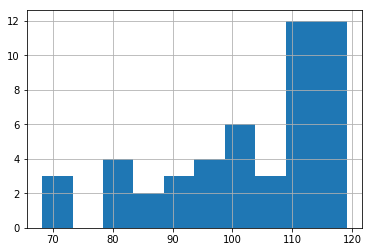

In [31]:
df[df['ni.age']%1 != 0]['ni.age'].hist()  # histogram of age with decimals (all elderly)


### Categorical data -> dummy variable


## Individual Variable

### Tenure

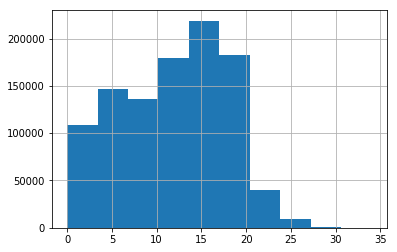

In [32]:
df['tenure'].hist() #log trans is not applicable due to 0 values

In [33]:
df.groupby('cancel')['claim.ind'].mean()

cancel
0    0.185638
1    0.243629
Name: claim.ind, dtype: float64

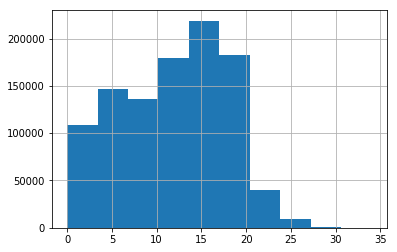

In [34]:
df['tenure'].hist()
#df['tenure'].apply(np.log).hist() # log 0 exists

### zip.code

In [35]:
df.describe()

,cancel,year,zip.code,ni.age,len.at.res,premium,ni.marital.status,n.adults,n.children,tenure,claim.ind
count,1.024521e+06,1.024521e+06,1.024521e+06,1.024521e+06,1.024521e+06,1.024521e+06,1.024521e+06,1.024521e+06,1.024521e+06,1.024521e+06,1.024521e+06
mean,2.423406e-01,2.014630e+03,6.235341e+04,4.356313e+01,1.510103e+01,8.998909e+02,7.100372e-01,2.133890e+00,1.737739e+00,1.170866e+01,1.996914e-01
std,4.284995e-01,1.111147e+00,2.800418e+04,1.175232e+01,4.249837e+00,7.770463e+01,4.537451e-01,1.253971e+00,2.342959e+00,5.918365e+00,3.997685e-01
min,0.000000e+00,2.013000e+03,1.500100e+04,1.800000e+01,1.000000e+00,6.123895e+02,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.014000e+03,5.000900e+04,3.500000e+01,1.200000e+01,8.439272e+02,0.000000e+00,1.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00
50%,0.000000e+00,2.015000e+03,8.001100e+04,4.300000e+01,1.500000e+01,8.997051e+02,1.000000e+00,2.000000e+00,1.000000e+00,1.300000e+01,0.000000e+00
75%,0.000000e+00,2.016000e+03,8.503000e+04,5.100000e+01,1.800000e+01,9.553957e+02,1.000000e+00,3.000000e+00,2.000000e+00,1.600000e+01,0.000000e+00
max,1.000000e+00,2.016000e+03,9.803800e+04,1.200000e+02,4.999854e+01,1.243311e+03,1.000000e+00,1.200000e+01,1.200000e+01,3.400000e+01,1.000000e+00


# Groupby


In [36]:
df.columns

Index(['cancel', 'year', 'zip.code', 'house.color', 'ni.age', 'len.at.res',
       'credit', 'coverage.type', 'dwelling.type', 'premium', 'sales.channel',
       'ni.gender', 'ni.marital.status', 'n.adults', 'n.children', 'tenure',
       'claim.ind'],
      dtype='object')

In [37]:
df.groupby([
       'credit', 'coverage.type', 'dwelling.type', 'sales.channel',
       'ni.gender', 'ni.marital.status', 'n.adults', 'n.children', 
       'claim.ind'], as_index = False).mean()

,credit,coverage.type,dwelling.type,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,claim.ind,cancel,year,zip.code,ni.age,len.at.res,premium,tenure
0,high,A,Condo,Broker,F,0,1,0,0,0.121908,2014.675795,61736.689046,41.196113,15.122172,899.667289,11.441696
1,high,A,Condo,Broker,F,0,1,0,1,0.189369,2014.604651,62502.916944,40.528239,15.208464,900.012551,10.953488
2,high,A,Condo,Broker,F,0,1,1,0,0.115578,2014.628141,62390.125628,40.597990,15.205742,903.787526,11.040201
3,high,A,Condo,Broker,F,0,1,1,1,0.125000,2014.675000,61753.900000,40.850000,14.722649,894.441576,11.200000
4,high,A,Condo,Broker,F,0,1,2,0,0.190476,2014.571429,66129.047619,40.571429,15.717222,919.665364,10.841270
5,high,A,Condo,Broker,F,0,1,2,1,0.083333,2014.500000,69940.250000,41.666667,18.500000,919.892330,11.583333
6,high,A,Condo,Broker,F,0,2,0,0,0.140464,2014.627577,62225.506443,40.948454,15.139919,901.683773,11.162371
7,high,A,Condo,Broker,F,0,2,0,1,0.146341,2014.713415,63848.780488,41.268293,15.448583,897.510587,11.817073
8,high,A,Condo,Broker,F,0,2,1,0,0.154472,2014.642276,60773.951220,41.040650,14.907534,898.102835,11.756098
9,high,A,Condo,Broker,F,0,2,1,1,0.216216,2015.054054,58149.891892,42.135135,14.891892,894.837967,11.702703


In [38]:
#df_test.groupby(['house.color','credit', 'coverage.type', 'dwelling.type', 'sales.channel','ni.gender', 'ni.marital.status', 'n.adults', 'n.children', 
 #      'claim.ind'], as_index = False).mean()

## Categorical Values

In [39]:
categorical = ['house.color', 'coverage.type', 'dwelling.type', 'sales.channel']
# binary = ['ni.gender']
# ordinal = ['credit']
dummy_var = pd.get_dummies(df[categorical])
df.head(10)

,cancel,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,0,2013,98004,blue,37.0,18.000000,high,C,Tenant,950.507336,Broker,F,0,2,0,15.0,0
1,0,2013,85017,white,40.0,17.000000,medium,A,Condo,909.346046,Broker,F,1,5,0,15.0,0
2,0,2013,80021,white,45.0,14.000000,high,A,House,897.084502,Phone,M,0,1,0,14.0,0
3,0,2013,85002,red,45.0,24.366136,high,A,House,979.039007,Phone,M,0,5,0,22.0,1
4,0,2013,50001,yellow,36.0,16.000000,high,C,House,932.379027,Broker,M,1,2,4,4.0,0
5,0,2013,15046,white,51.0,17.000000,high,A,House,930.727924,Phone,M,1,1,2,16.0,0
6,0,2013,85048,blue,34.0,11.000000,medium,A,Condo,1045.507170,Broker,F,1,2,3,3.0,0
7,0,2013,50036,blue,33.0,18.000000,high,A,Condo,895.230584,Broker,F,0,1,0,7.0,0
8,0,2013,80037,white,28.0,10.000000,medium,C,Tenant,950.436126,Broker,M,1,1,1,8.0,0
9,0,2013,15019,red,37.0,19.000000,high,C,House,803.719895,Broker,M,0,2,1,15.0,0


In [40]:
dummy_var.head(5)

,house.color_blue,house.color_red,house.color_white,house.color_yellow,coverage.type_A,coverage.type_B,coverage.type_C,dwelling.type_Condo,dwelling.type_House,dwelling.type_Tenant,sales.channel_Broker,sales.channel_Online,sales.channel_Phone
0,1,0,0,0,0,0,1,0,0,1,1,0,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0
2,0,0,1,0,1,0,0,0,1,0,0,0,1
3,0,1,0,0,1,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,1,0,1,0,1,0,0


In [41]:
dummy_var_2 = dummy_var.rename(columns={
    "house.color_blue":'blue', 'house.color_red':'red', 
    'house.color_white':'white', 'house.color_yellow':'yellow',
    'coverage.type_A':'A','coverage.type_B':'B', 'coverage.type_C':'C', 
    'dwelling.type_Condo':'condo', 'dwelling.type_House':'house', 'dwelling.type_Tenant':'tenant', 
    'sales.channel_Broker':'broker', 'sales.channel_Online':'online', 'sales.channel_Phone':'phone'},
                               inplace = True)
#dummy_var_2.head()

In [42]:
dummy_var.head(5)

,blue,red,white,yellow,A,B,C,condo,house,tenant,broker,online,phone
0,1,0,0,0,0,0,1,0,0,1,1,0,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0
2,0,0,1,0,1,0,0,0,1,0,0,0,1
3,0,1,0,0,1,0,0,0,1,0,0,0,1
4,0,0,0,1,0,0,1,0,1,0,1,0,0


In [43]:
# Merge dummy_var with df
df = pd.concat([df,dummy_var], axis = 1)
df.head(5)

# Drop original categorical vars
df.drop(df[categorical], axis = 1, inplace = True)
df.head(5)

,cancel,year,zip.code,ni.age,len.at.res,credit,premium,ni.gender,ni.marital.status,n.adults,...,yellow,A,B,C,condo,house,tenant,broker,online,phone
0,0,2013,98004,37.0,18.000000,high,950.507336,F,0,2,...,0,0,0,1,0,0,1,1,0,0
1,0,2013,85017,40.0,17.000000,medium,909.346046,F,1,5,...,0,1,0,0,1,0,0,1,0,0
2,0,2013,80021,45.0,14.000000,high,897.084502,M,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,2013,85002,45.0,24.366136,high,979.039007,M,0,5,...,0,1,0,0,0,1,0,0,0,1
4,0,2013,50001,36.0,16.000000,high,932.379027,M,1,2,...,1,0,0,1,0,1,0,1,0,0


In [44]:
df.shape

(1024521, 26)

In [45]:
df.columns[0:103]

Index(['cancel', 'year', 'zip.code', 'ni.age', 'len.at.res', 'credit',
       'premium', 'ni.gender', 'ni.marital.status', 'n.adults', 'n.children',
       'tenure', 'claim.ind', 'blue', 'red', 'white', 'yellow', 'A', 'B', 'C',
       'condo', 'house', 'tenant', 'broker', 'online', 'phone'],
      dtype='object')

## Ordinal variable

In [46]:
# Create a mapper
mapper = {'low':1, 'medium':2, 'high':3}

In [47]:
# Map feature values to credit
df['credit'] = df['credit'].replace(mapper)

In [48]:
df.head(5)

,cancel,year,zip.code,ni.age,len.at.res,credit,premium,ni.gender,ni.marital.status,n.adults,...,yellow,A,B,C,condo,house,tenant,broker,online,phone
0,0,2013,98004,37.0,18.000000,3,950.507336,F,0,2,...,0,0,0,1,0,0,1,1,0,0
1,0,2013,85017,40.0,17.000000,2,909.346046,F,1,5,...,0,1,0,0,1,0,0,1,0,0
2,0,2013,80021,45.0,14.000000,3,897.084502,M,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,2013,85002,45.0,24.366136,3,979.039007,M,0,5,...,0,1,0,0,0,1,0,0,0,1
4,0,2013,50001,36.0,16.000000,3,932.379027,M,1,2,...,1,0,0,1,0,1,0,1,0,0


## Dummy variable

In [49]:
gender_mapper = {'F':0, 'M':1}
df['ni.gender'] = df['ni.gender'].replace(gender_mapper)
df.head(5)

,cancel,year,zip.code,ni.age,len.at.res,credit,premium,ni.gender,ni.marital.status,n.adults,...,yellow,A,B,C,condo,house,tenant,broker,online,phone
0,0,2013,98004,37.0,18.000000,3,950.507336,0,0,2,...,0,0,0,1,0,0,1,1,0,0
1,0,2013,85017,40.0,17.000000,2,909.346046,0,1,5,...,0,1,0,0,1,0,0,1,0,0
2,0,2013,80021,45.0,14.000000,3,897.084502,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,2013,85002,45.0,24.366136,3,979.039007,1,0,5,...,0,1,0,0,0,1,0,0,0,1
4,0,2013,50001,36.0,16.000000,3,932.379027,1,1,2,...,1,0,0,1,0,1,0,1,0,0


# Export to CSV

In [50]:
df.to_csv("cleaned.csv")

# Go Through Models

In [51]:
#Subset to x and y
xlst, ysgn = ['year', 'zip.code', 'ni.age', 'len.at.res', 'credit',
       'premium', 'ni.gender', 'ni.marital.status', 'n.adults', 'n.children',
       'tenure', 'claim.ind', 'blue', 'red', 'white', 'yellow', 'A', 'B', 'C',
       'condo', 'house', 'tenant', 'broker', 'online', 'phone'], 'cancel'
x, y = df[xlst], df[ysgn]

In [52]:
print('x')
print(x.tail())
print('y')
print(y.tail())


x
         year  zip.code  ni.age  len.at.res  credit      premium  ni.gender  \
1048570  2013     50048    74.0        20.0       3   926.857762          0   
1048571  2013     15028    44.0        14.0       3   968.546580          1   
1048572  2013     80036    63.0        18.0       3   838.446947          0   
1048573  2013     15037    22.0        11.0       3  1026.261620          1   
1048574  2013     50010    59.0        13.0       3   907.387213          1   

         ni.marital.status  n.adults  n.children  ...    yellow  A  B  C  \
1048570                  0         3           0  ...         0  1  0  0   
1048571                  0         4           0  ...         0  1  0  0   
1048572                  1         4           1  ...         0  1  0  0   
1048573                  1         1           1  ...         0  0  0  1   
1048574                  1         1           3  ...         0  1  0  0   

         condo  house  tenant  broker  online  phone  
1048570    

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

#The “slope” parameters (w), also called weights or coefficients, are stored in the coef_
#..attribute, while the offset or intercept (b) is stored in the intercept_ attribute:

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))


lr.coef_: [-7.41733744e-03  1.17031479e-07 -3.99068945e-03 -3.36509542e-03
 -1.24541296e-01 -1.35614594e-04  4.58988186e-04 -6.07740133e-02
  1.32526614e-02  2.14603716e-02  4.42976439e-03  6.69564000e-02
  4.17005156e-04 -3.10401054e-04  3.51743955e-04 -4.58348057e-04
 -9.36298831e-03 -1.68326677e-03  1.10462551e-02 -1.99491057e-03
 -5.67046580e-03  7.66537636e-03 -8.47594472e-02  2.27386237e-02
  6.20208235e-02]
lr.intercept_: 15.770655522568708


In [54]:
# Let’s look at the training set and test set performance using r squared:

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

#cross validation
from sklearn.model_selection import cross_val_score

print(np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10)))



Training set score: 0.10
Test set score: 0.10
0.10487449073387345


In [150]:
! pip install pandas-profiling

distributed 1.21.8 requires msgpack, which is not installed.
keras 2.2.2 has requirement keras_applications==1.0.4, but you'll have keras-applications 1.0.2 which is incompatible.
keras 2.2.2 has requirement keras_preprocessing==1.0.2, but you'll have keras-preprocessing 1.0.1 which is incompatible.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [151]:
import pandas_profiling

/anaconda3/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/anaconda3/lib/python3.6/site-packag

In [153]:
pandas_profiling.ProfileReport(df)

Number of variables,27
Number of observations,1024521
Total Missing (%),0.0%
Total size in memory,122.1 MiB
Average record size in memory,125.0 B
Numeric,10
Categorical,0
Boolean,17
Date,0
Text (Unique),0
Rejected,0


In [154]:
test = pd.read_csv('test.csv')

In [155]:
pandas_profiling.ProfileReport(test)

Number of variables,17
Number of observations,444430
Total Missing (%),0.1%
Total size in memory,57.6 MiB
Average record size in memory,136.0 B
Numeric,10
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,1
